2-element Vector{Float64}:
 10.278551532033433
 79.47075208913648

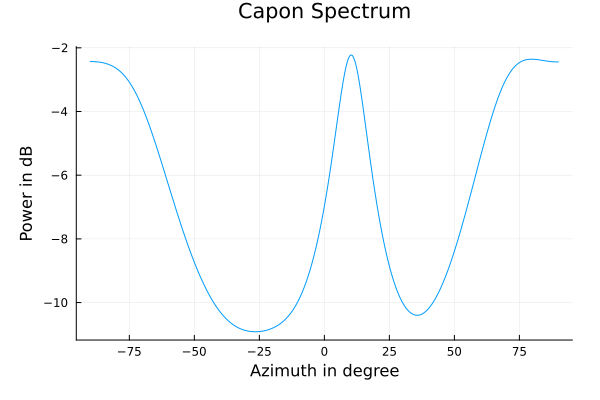

In [4]:
using ArraySignalProcessing
using LinearAlgebra

fc = 150e6

# Spacing:  1m is λ/2 for 150MHz 
# Oriented along yaxis to match Matlab behavior
pa = IsotropicArray([0 0 0 0;
                    -1.5 -0.5 0.5 1.5])

# test signal generation
Rss = I(2)
Θ = deg2rad.([10, 80])
d = length(Θ)
N = 2000
SNR = 5
X = unconditional_signals(pa, Rss, N, SNR, Θ, fc)
Rxx = X*X'/N

# Capon spectrum 
# Same as steering capon_weights / mpdr_weights 
# but using the capon function is more convenient for
# DoA estimation
ϕaxis = LinRange(-90, 90, 360)
P = capon(pa, Rxx, deg2rad.(ϕaxis), fc)
display(find_doas(ϕaxis, P, d))
using Plots
import Measures
p1 = plot(ϕaxis, 10*log10.(P))
plot!(title="Capon Spectrum", legend = false, margin=5*Measures.mm)
xlabel!("Azimuth in degree")
ylabel!("Power in dB")

2-element Vector{Float64}:
 10.278551532033433
 79.47075208913648

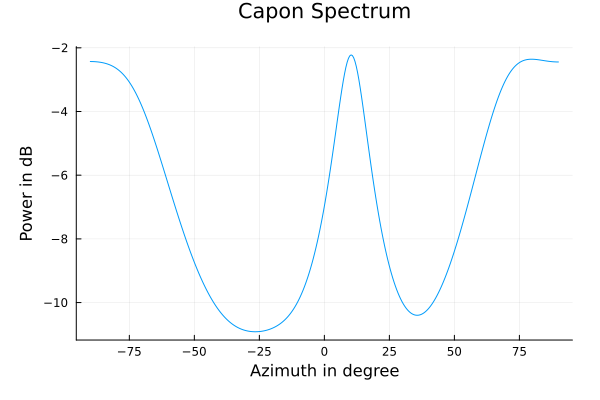

In [5]:
using  CUDA
pa = IsotropicArray(cu([0 0 0 0;
                    -1.5 -0.5 0.5 1.5]))
P = capon(pa, cu(Rxx), cu(deg2rad.(ϕaxis)), fc)
display(find_doas(ϕaxis, Array(P), d))

using Plots
import Measures
p1 = plot(ϕaxis, Array(10*log10.(P)))
plot!(title="Capon Spectrum", legend = false, margin=5*Measures.mm)
xlabel!("Azimuth in degree")
ylabel!("Power in dB")